# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>

</a></span></li></ul></div>

## Загрузка и подготовка данных

### Откроем файл с данными и изучим общую информацию

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# загрузим файлы
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# посмотрим на распределение объема запасов нефти по регионам
def custom_hist(x: pd.Series):
    plt.figure()
    plt.hist(x, edgecolor='black')
    plt.grid()

### Таблица `geo_data_0`

(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


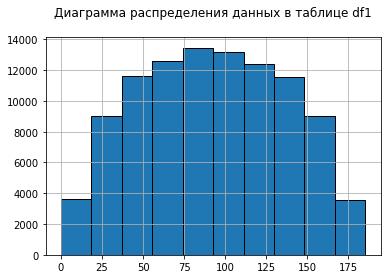

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# изучим файл

print(df1.shape)
df1.info()

# вывод на экран названия столбцов
df1.columns

# посмотрим на диаграмму
custom_hist(df1['product'])

plt.title('Диаграмма распределения данных в таблице df1'+ "\n")
plt.show()

# выведем на экран таблицу, посморим на первые и последние 5 значений
df1

In [5]:
# посмртрим на числовые характеристики
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# посмотрим сколько нулевых значений в таблице
sum(df1['product']==0)

1

In [7]:
# посмотрим если пропуски в таблице
df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
# подсчёт явных дубликатов
df1.duplicated().sum()

0

### Таблица `geo_data_1`

(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


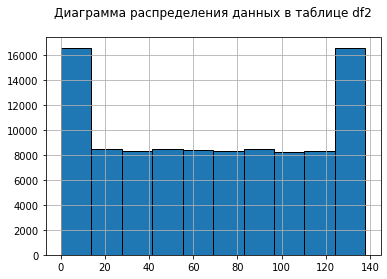

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [9]:
# изучим файлы

print(df2.shape)
df2.info()

# вывод на экран названия столбцов
df2.columns

# посмотрим на диаграмму
custom_hist(df2['product'])

plt.title('Диаграмма распределения данных в таблице df2'+ "\n")
plt.show()

df2

In [10]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
sum(df2['product']==0)

8235

In [12]:
# посмотрим если пропуски в таблице
df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# подсчёт явных дубликатов
df2.duplicated().sum()

0

### Таблица `geo_data_2`

(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


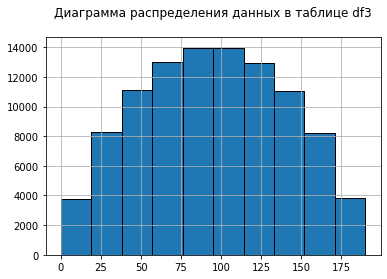

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [14]:
# изучим файлы

print(df3.shape)
df3.info()

# вывод на экран названия столбцов
df3.columns

# посмотрим на диаграмму
custom_hist(df3['product'])

plt.title('Диаграмма распределения данных в таблице df3'+ "\n")
plt.show()

df3

In [15]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [16]:
sum(df3['product']==0)

1

In [17]:
# посмотрим если пропуски в таблице
df3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
# подсчёт явных дубликатов
df3.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px">

### Общий вывод

Данные загружены и изучены.

Данные геологоразведки трёх регионов находятся в файлах:
- /datasets/geo_data_0.csv. Скачать датасет
- /datasets/geo_data_1.csv. Скачать датасет
- /datasets/geo_data_2.csv. Скачать датасет    

    Признаки:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей). 
 
Для удобства назовем датафреймы `df1`, `df2`, `df3`. В таблицах 10000 строк и 5 колонок.    

**Таблица `df1`**  
Пропусков в данных не обнаружено, явных дубликатов не имеется. Обнаружена одна скважина с нулевым запасом нефти. Средние и медианные значения запасов нефти практически равны. Распределение целевого признака близко к нормальному.
    
**Таблица `df2`**   
Пропусков в данных не обнаружено, явных дубликатов не имеется. Обнаружено 8235 скважин с нулевм запасом нефти, т.е. 82% скважин в этом регионе пустые. Средние значения больше медианных значений запасов нефти, что говорит о том, что объем запасов в одних скважинах сильно отличается от других (выбросы). Распределение целевого признака далеко от нормального.
 
**Таблица `df3`**   
Пропусков в данных не обнаружено, явных дубликатов не имеется. Обнаружена одна скважина с нулевым запасом нефти. Средние и медианные значения запасов нефти практически равны. Распределение целевого признака близко к нормальному.   
    
Нам предоставлены пробы нефти в трёх регионах. В каждом регионе разное распределение данных по скважинам и объемам. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, - поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
    
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются. 
        
</div> 

## Обучение и проверка модели

In [19]:
# обучение и проверка модели на данных региона 1

target = df1['product']
features = df1.drop(['product', 'id'] , axis=1)
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression(fit_intercept=True)
model.fit(features_train1, target_train1)
predicted_valid1 = model.predict(features_valid1) 
rmse1 = mean_squared_error(target_valid1, predicted_valid1)**0.5

print("Cредний запас предсказанного сырья первого региона =", predicted_valid1.mean().round(2))
print("RMSE3 первого региона = {0:.2f}".format(rmse1))

Cредний запас предсказанного сырья первого региона = 92.59
RMSE3 первого региона = 37.58


In [20]:
# обучение и проверка модели на данных региона 2

target = df2['product'] # извлекаем целевой признак
features = df2.drop(['product', 'id'] , axis=1) # извлекаем признаки 
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features, target, test_size=0.25, random_state=12345) # отделяем 25% данных для валидационной выборки

model = LinearRegression() # инициализируем модель LinearRegression
model.fit(features_train2, target_train2) # обучаем модель на тренировочной выборке
predicted_valid2 = model.predict(features_valid2) # получаем предсказания модели на валидационной выборке
rmse2 = mean_squared_error(target_valid2, predicted_valid2)**0.5 # посчитаем значение метрики RMSE на валидационной выборке

print("Cредний запас предсказанного сырья второго региона =", predicted_valid2.mean().round(2))
print("RMSE3 второго региона = {0:.2f}".format(rmse2))

Cредний запас предсказанного сырья второго региона = 68.73
RMSE3 второго региона = 0.89


In [21]:
# обучение и проверка модели на данных региона 3

target = df3['product']
features = df3.drop(['product', 'id'] , axis=1)
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train3, target_train3) 
predicted_valid3 = model.predict(features_valid3) 
rmse3 = mean_squared_error(target_valid3, predicted_valid3)**0.5

print("Cредний запас предсказанного сырья третьего региона =", predicted_valid3.mean().round(2))
print("RMSE3 третьего региона = {0:.2f}".format(rmse3))

Cредний запас предсказанного сырья третьего региона = 94.97
RMSE3 третьего региона = 40.03


<div style="border:solid green 2px; padding: 20px">

### Вывод

Cредний запас предсказанного сырья  в первом и третьем регионе практически одинаковый, также одинаково высокий показатель RMSE (в среднем модели сильно ошибаются в предсказаниях). Однако во втором регионе несмотря на большое количество пустых скважин и меньшую величину среднего запаса нефти, показатель RMSE меньше единицы, что говорит о хороших предсказаниях модели.         

</div> 

## Подготовка к расчёту прибыли

In [22]:
# доход с каждой единицы продукта, руб.
income_per_barrel = 450 * 10**3

# бюджет на разработку скважин в регионе, руб.
budget = 10**10

# рассчитаем минимальный объём сырья для безубыточной разработки новой скважины, тыс. баррелей
min_product = budget/income_per_barrel

print("Точка безубыточности: {0:.0f} тыс. баррелей".format(min_product))

Точка безубыточности: 22222 тыс. баррелей


In [23]:
print("Средний объем нефти в скважине для безубыточного функционирования:", np.ceil(min_product/200))

Средний объем нефти в скважине для безубыточного функционирования: 112.0


<div style="border:solid green 2px; padding: 20px">

### Вывод

Из анализа данных, средний запас предсказанного сырья в одной скважине:
- 1 регион = 92.59 тыс. баррелей
- 2 регион = 68.72 тыс. баррелей
- 3 регион = 68.72 тыс. баррелей

Средний объем нефти в одной скважине для безубыточного функционирования: 112.0 тыс. баррелей

Запас сырья в скважинах регионов меньше, чем точка безубыточности.
    
</div> 

In [24]:
# функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

def profit(target, predictions):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)[:200]
    target_sorted = (target.reset_index(drop=True)[predictions_sorted.index])
    target_sum = target_sorted.sum()
    return round(target_sum * income_per_barrel - budget,2)

print("Прибыль с лучших 200 скважин в первом регионе: {0:.2f} млрд. руб.".format(profit(target_valid1, predicted_valid1)/10**9))
print("Прибыль с лучших 200 скважин во втором регионе: {0:.2f} млрд. руб.".format(profit(target_valid2, predicted_valid2)/10**9)) 
print("Прибыль с лучших 200 скважин в третьем регионе: {0:.2f} млрд. руб.".format(profit(target_valid3, predicted_valid3)/10**9))

Прибыль с лучших 200 скважин в первом регионе: 3.32 млрд. руб.
Прибыль с лучших 200 скважин во втором регионе: 2.42 млрд. руб.
Прибыль с лучших 200 скважин в третьем регионе: 2.71 млрд. руб.


## Расчёт прибыли и рисков 

### Первый регион:

In [25]:
state = np.random.RandomState(12345)
samples = []

for i in range(1000):
    sample = pd.Series(predicted_valid1).sample(n=500, replace=True, random_state=state)
    samples.append(profit(target_valid1, sample))
    
samples = pd.Series(samples)
mean = samples.mean().round(2)

lower = samples.quantile(0.025).round(2) 
upper = samples.quantile(0.975).round(2) 
risk = (samples < 0).mean() * 100

print("ПЕРВЫЙ РЕГИОН:")
print("Средняя прибыль:", mean)
print("95%-й доверитльный интервал:", lower, ',', upper)
print("Риск убытков региона =", risk, '%')

ПЕРВЫЙ РЕГИОН:
Средняя прибыль: 396164984.8
95%-й доверитльный интервал: -111215545.89 , 909766941.55
Риск убытков региона = 6.9 %


### Второй регион:

In [26]:
state = np.random.RandomState(12345)
samples = []

for i in range(1000):
    sample = pd.Series(predicted_valid2).sample(n=500, replace=True, random_state=state)
    samples.append(profit(target_valid2, sample))
    
samples = pd.Series(samples)
mean = samples.mean().round(2)

lower = samples.quantile(0.025).round(2) 
upper = samples.quantile(0.975).round(2) 
risk = (samples < 0).mean() * 100

print("ВТОРОЙ РЕГИОН:")
print("Средняя прибыль:", mean)
print("95%-й доверитльный интервал:", lower, ',', upper)
print("Риск убытков региона =", risk, '%')

ВТОРОЙ РЕГИОН:
Средняя прибыль: 456045105.79
95%-й доверитльный интервал: 33820509.4 , 852289453.86
Риск убытков региона = 1.5 %


### Третий регион:

In [27]:
state = np.random.RandomState(12345)
samples = []

for i in range(1000):
    sample = pd.Series(predicted_valid3).sample(n=500, replace=True, random_state=state)
    samples.append(profit(target_valid3, sample))
    
samples = pd.Series(samples)
mean = samples.mean().round(2)

lower = samples.quantile(0.025).round(2) 
upper = samples.quantile(0.975).round(2) 
risk = (samples < 0).mean() * 100

print("ТРЕТИЙ РЕГИОН:")
print("Средняя прибыль:", mean)
print("95%-й доверитльный интервал:", lower, ',', upper)
print("Риск убытков региона =", risk, '%')

ТРЕТИЙ РЕГИОН:
Средняя прибыль: 404403866.57
95%-й доверитльный интервал: -163350413.39 , 950359574.93
Риск убытков региона = 7.6 %


<div style="border:solid green 2px; padding: 20px">
    
## Вывод  

Анализ представленных данных показал, что наиболее перспективным для разработки является регион № 2, поскольку риски убытков наименьшие, а средняя прибыль наибольшая. Однако следует учитывать, что запасы объема нефти распределены по скважинам неравномерно, большая часть месторождений в регионе пустые.     
    
</div>    